<a href="https://colab.research.google.com/github/sanjana-singamsetty/Finance-expense-tracker/blob/main/implementation_odf_models_ipynb.ipynb%20--%20final%20" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

- [1. Loading Libraries and Data](#loading-libraries-and-data)
- [2. Starting to Cleaning and Reading Data](#starting-to-cleaning-and-reading-data)
- [3. Drop Impractical Columns](#drop-impractical-columns)
- [4. Removing Outliers (Sales)](#removing-outliers-sales)
- [5. Prepare for Time-Series](#prepare-for-time-series)
- [6. Exploring Data (Numerical & Categorical)](#exploring-data-numerical--categorical)
- [7. Exploring Time-Series Charts](#exploring-time-series-charts)
  - [7.1 Visualize the Time Series (Line Plot)](#visualize-the-time-series-line-plot)
  - [7.2 Rolling Mean](#rolling-mean)
  - [7.3 Decomposition (Separating Trend, Seasonality, and Residuals)](#decomposition-separating-trend-seasonality-and-residuals)
  - [7.4 Seasonal Plots: Comparing Sales Across Different Time Periods](#seasonal-plots-comparing-sales-across-different-time-periods)
  - [7.5 Stationarity Check](#stationarity-check)
  - [7.6 Autocorrelation and Partial Autocorrelation](#autocorrelation-and-partial-autocorrelation)
  - [7.7 Feature Impacts](#feature-impacts)
- [8. Modelling](#modelling)
  - [8.1 ARIMA](#arima)
  - [8.2 SARIMA](#sarima)
  - [8.3 FB Prophet](#fb-prophet)



# 1. Loading Libraries and Data
<a id="loading-libraries-and-data"></a>

In [ ]:
!pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

# Load dataset (adjust file name accordingly)
df = pd.read_csv(f"{path}/sales_data_sample.csv", encoding="ISO-8859-1")

# Display first few rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
# Check data info
df.info()

# Check for missing values
df.isnull().sum()

# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Display first few rows after conversion
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
# Drop unnecessary columns
df.drop(columns=[
    "ORDERLINENUMBER", "ADDRESSLINE1", "ADDRESSLINE2", "CONTACTLASTNAME",
    "CONTACTFIRSTNAME", "TERRITORY", "STATE", "POSTALCODE"
], inplace=True)

# Display first few rows after dropping columns
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,Small
1,10121,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Reims,France,Small
2,10134,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,Medium
3,10145,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,Medium
4,10159,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,Medium


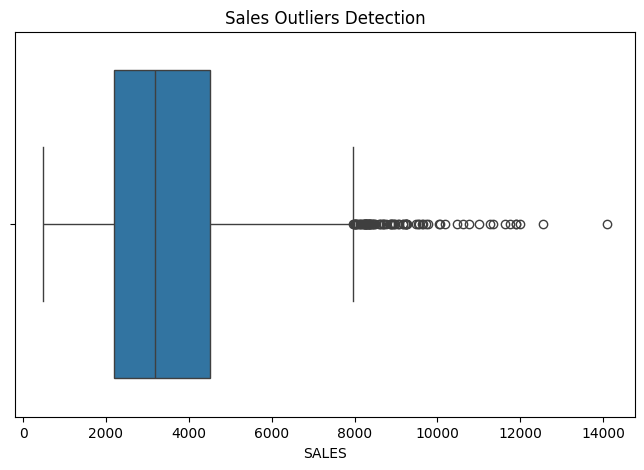

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,COUNTRY,DEALSIZE
0,10107,30,95.70,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,Small
1,10121,34,81.35,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Reims,France,Small
2,10134,41,94.74,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,Medium
3,10145,45,83.26,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,Medium
4,10159,49,100.00,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,Medium


In [ ]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['SALES'])
plt.title("Sales Outliers Detection")
plt.show()

# Calculate IQR
Q1 = df['SALES'].quantile(0.25)
Q3 = df['SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['SALES'] >= lower_bound) & (df['SALES'] <= upper_bound)]

# Display first few rows after removing outliers
df.head()


In [ ]:
# Set ORDERDATE as index
df.set_index("ORDERDATE", inplace=True)

# Aggregate daily sales
df_daily_sales = df.resample("D")["SALES"].sum().reset_index()

# Display first few rows
df_daily_sales.head()


,ORDERDATE,SALES
0,2003-01-06,12133.25
1,2003-01-07,0.00
2,2003-01-08,0.00
3,2003-01-09,11432.34
4,2003-01-10,6864.05


In [ ]:
# Summary statistics for numerical columns
df.describe()

# Unique values in categorical columns
categorical_cols = ["STATUS", "YEAR_ID", "MONTH_ID", "QTR_ID", "DEALSIZE", "COUNTRY"]
for col in categorical_cols:
    print(f"{col} unique values:\n", df[col].value_counts(), "\n")


STATUS unique values:
 STATUS
Shipped       2543
Cancelled       60
Resolved        46
On Hold         43
In Process      39
Disputed        11
Name: count, dtype: int64 

YEAR_ID unique values:
 YEAR_ID
2004    1315
2003     975
2005     452
Name: count, dtype: int64 

MONTH_ID unique values:
 MONTH_ID
11    585
10    309
5     241
1     224
2     217
3     207
8     186
12    176
4     167
9     166
7     136
6     128
Name: count, dtype: int64 

QTR_ID unique values:
 QTR_ID
4    1070
1     648
2     536
3     488
Name: count, dtype: int64 

DEALSIZE unique values:
 DEALSIZE
Medium    1384
Small     1282
Large       76
Name: count, dtype: int64 

COUNTRY unique values:
 COUNTRY
USA            974
Spain          334
France         301
Australia      179
UK             142
Italy          108
Finland         91
Norway          82
Singapore       76
Canada          69
Germany         61
Denmark         59
Sweden          57
Austria         53
Japan           51
Belgium         33
Switze

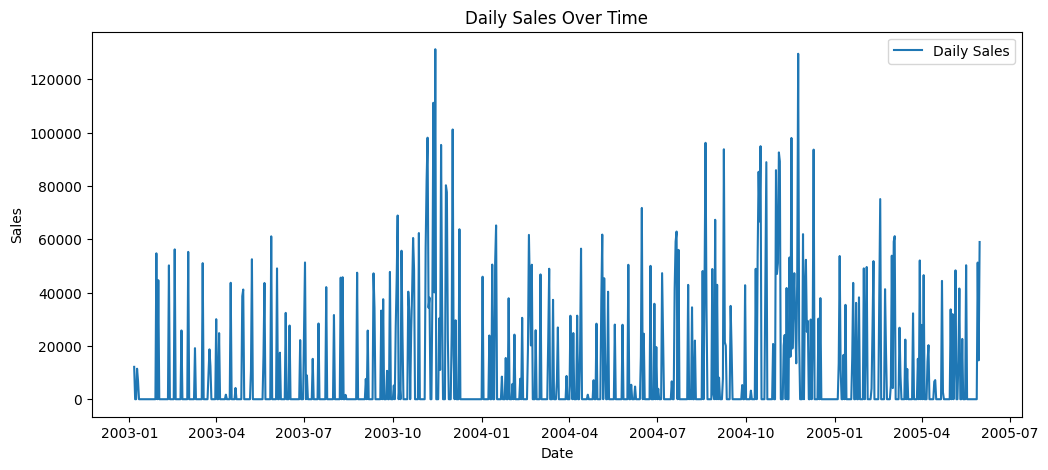

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["SALES"], label="Daily Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales Over Time")
plt.legend()
plt.show()


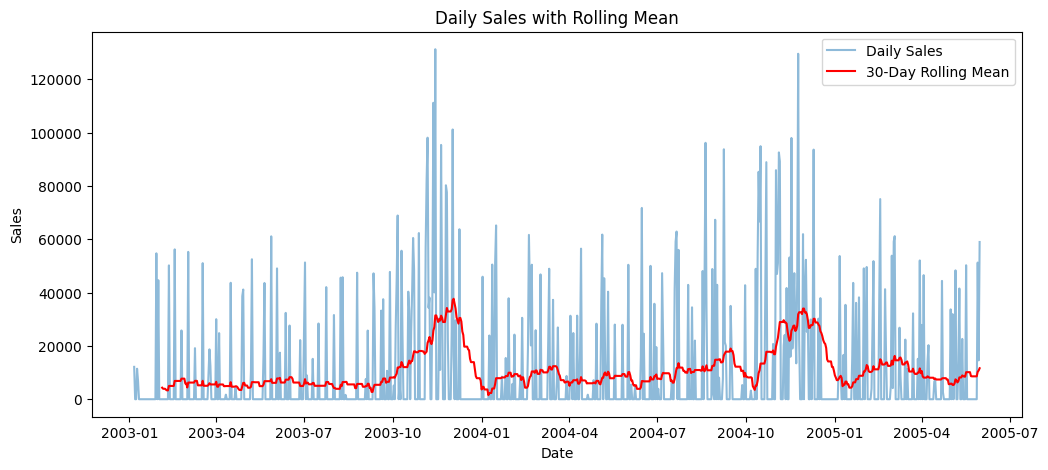

In [ ]:
# Rolling mean with a 30-day window
df_daily_sales["Rolling_Mean"] = df_daily_sales["SALES"].rolling(window=30).mean()

# Plot rolling mean
plt.figure(figsize=(12, 5))
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["SALES"], label="Daily Sales", alpha=0.5)
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["Rolling_Mean"], label="30-Day Rolling Mean", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales with Rolling Mean")
plt.legend()
plt.show()


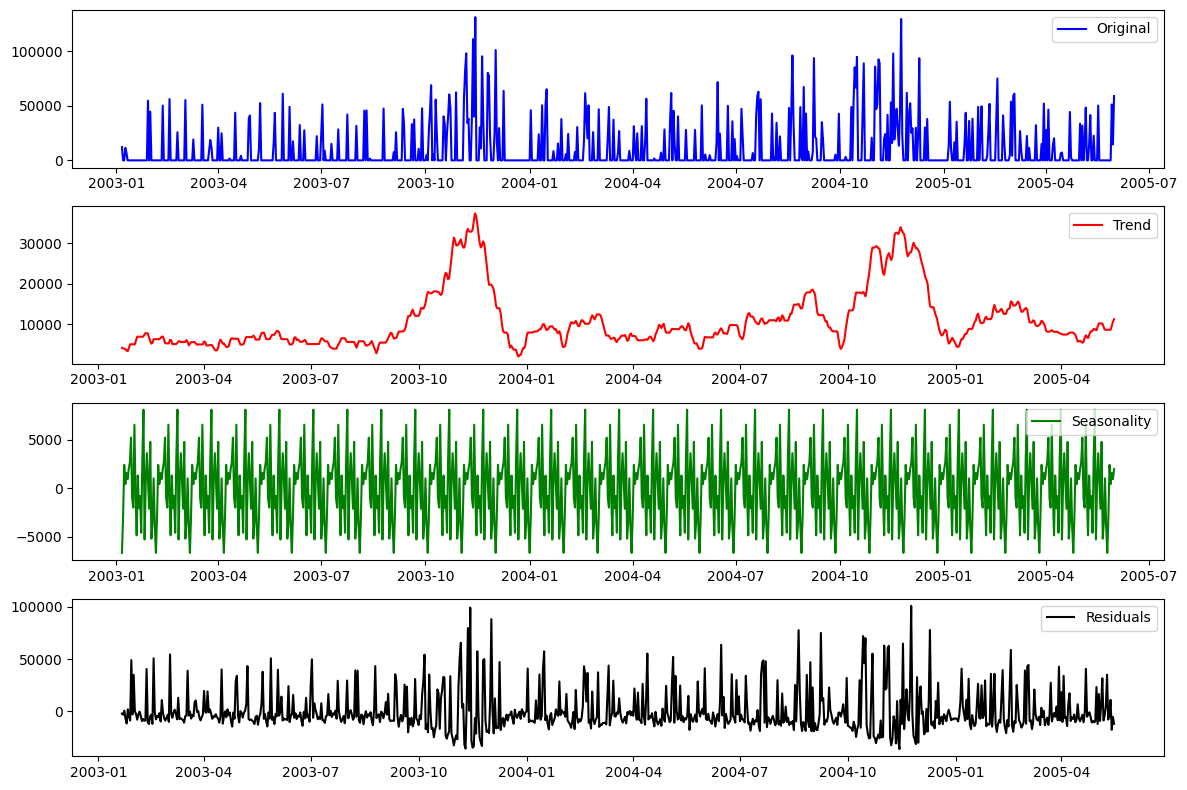

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(df_daily_sales.set_index("ORDERDATE")["SALES"], model="additive", period=30)

# Plot components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["SALES"], label="Original", color="blue")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="green")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residuals", color="black")
plt.legend()

plt.tight_layout()
plt.show()


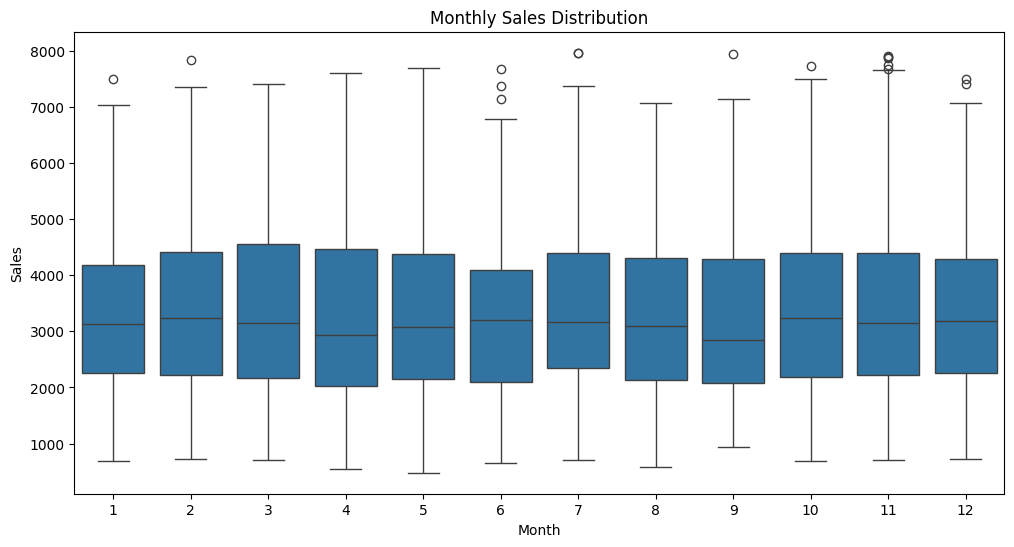

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["MONTH_ID"], y=df["SALES"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales Distribution")
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(df_daily_sales["SALES"])

# Print results
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Check stationarity
if adf_test[1] <= 0.05:
    print("The time series is stationary (Reject H0)")
else:
    print("The time series is NOT stationary (Fail to reject H0)")


ADF Test Statistic: -5.04138898520378
p-value: 1.8366728805132075e-05
Critical Values: {'1%': -3.4379500665211276, '5%': -2.864894878219008, '10%': -2.5685563904109867}
The time series is stationary (Reject H0)


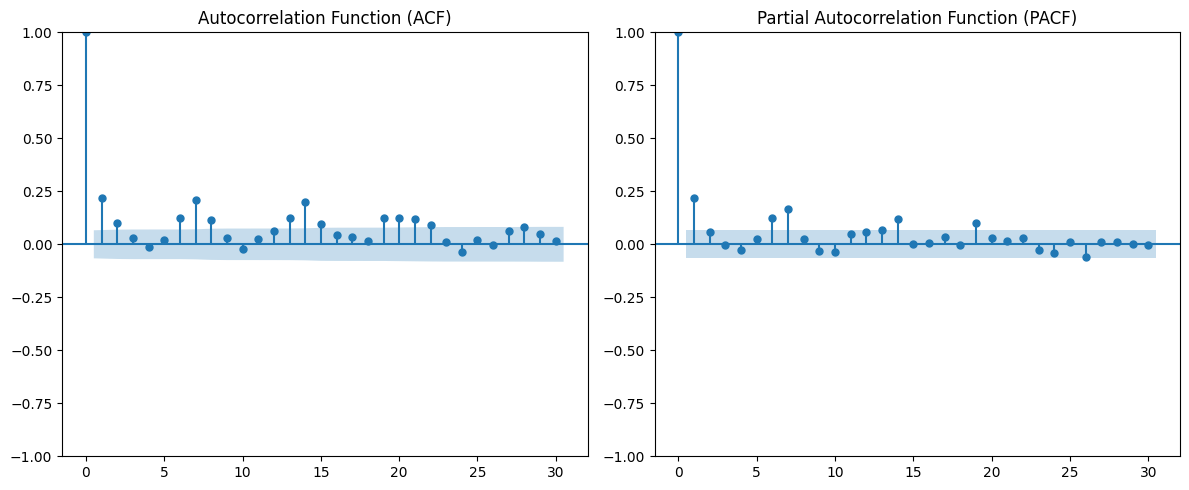

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 5))

plt.subplot(121)
plot_acf(df_daily_sales["SALES"], lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(122)
plot_pacf(df_daily_sales["SALES"], lags=30, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


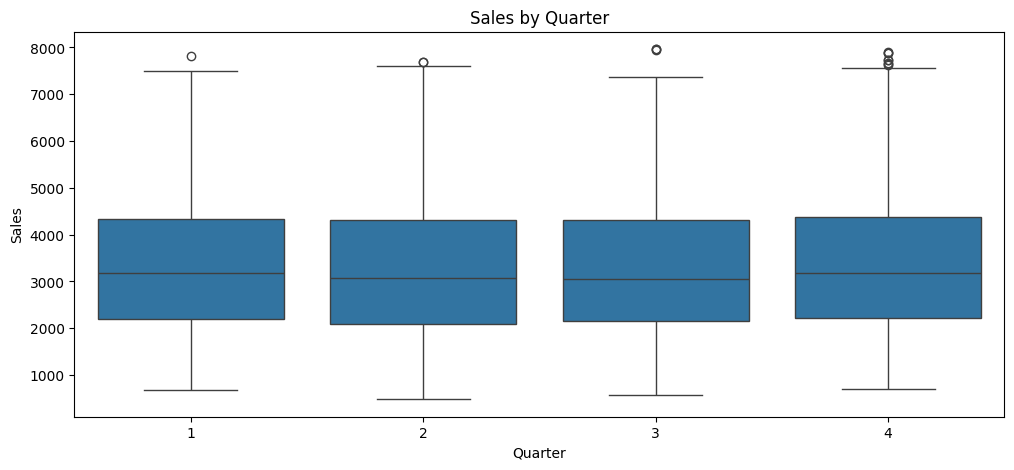

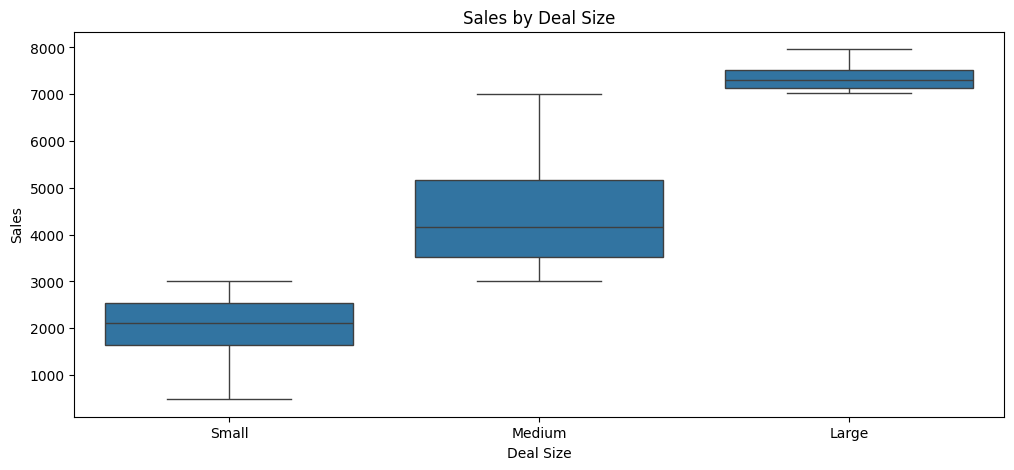

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["QTR_ID"], y=df["SALES"])
plt.xlabel("Quarter")
plt.ylabel("Sales")
plt.title("Sales by Quarter")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["DEALSIZE"], y=df["SALES"])
plt.xlabel("Deal Size")
plt.ylabel("Sales")
plt.title("Sales by Deal Size")
plt.show()


In [ ]:
!pip install pmdarima


In [ ]:
print(df_daily_sales["ARIMA_Predictions"].isna().sum())  # Count NaNs
print(np.isinf(df_daily_sales["ARIMA_Predictions"]).sum())  # Count infinities


1
0


In [ ]:
df_daily_sales["ARIMA_Predictions"].fillna(method="ffill", inplace=True)
df_daily_sales["ARIMA_Predictions"].fillna(method="bfill", inplace=True)  # Use only if ffill is not enough


In [ ]:
df_daily_sales["ARIMA_Predictions"].fillna(df_daily_sales["ARIMA_Predictions"].mean(), inplace=True)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define ARIMA model (order is chosen based on ACF/PACF plots)
arima_model = ARIMA(df_daily_sales["SALES"], order=(2,1,2))
arima_result = arima_model.fit()

# Predictions
df_daily_sales["ARIMA_Predictions"] = arima_result.predict(start=1, end=len(df_daily_sales), typ="levels")

# Evaluate ARIMA model
rmse_arima = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"]))
mae_arima = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])
mse_arima = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])
r2_arima = r2_score(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])

print(f"ARIMA Model Evaluation:\nRMSE: {rmse_arima}\nMAE: {mae_arima}\nMSE: {mse_arima}\nR²: {r2_arima}")




ValueError: Input contains NaN.

In [ ]:
print(df_daily_sales[df_daily_sales["ARIMA_Predictions"].isna()])


   ORDERDATE     SALES  Rolling_Mean  ARIMA_Predictions
0 2003-01-06  12133.25           NaN                NaN


In [ ]:
df_daily_sales["ARIMA_Predictions"].fillna(method="ffill", inplace=True)  # Forward fill
df_daily_sales["ARIMA_Predictions"].fillna(method="bfill", inplace=True)  # Backward fill (if needed)


In [ ]:
print(df_daily_sales["ARIMA_Predictions"].isna().sum())  # Should print 0


0


In [ ]:
rmse_arima = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"]))
mae_arima = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])
mse_arima = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])
r2_arima = r2_score(df_daily_sales["SALES"], df_daily_sales["ARIMA_Predictions"])


print(f"RMSE: {rmse_arima}")
print(f"MAE: {mae_arima}")
print(f"MSE: {mse_arima}")
print(f"R²: {r2_arima}")


RMSE: 20506.50722442669
MAE: 14464.83627496408
MSE: 420516838.54546404
R²: 0.06373472401937486


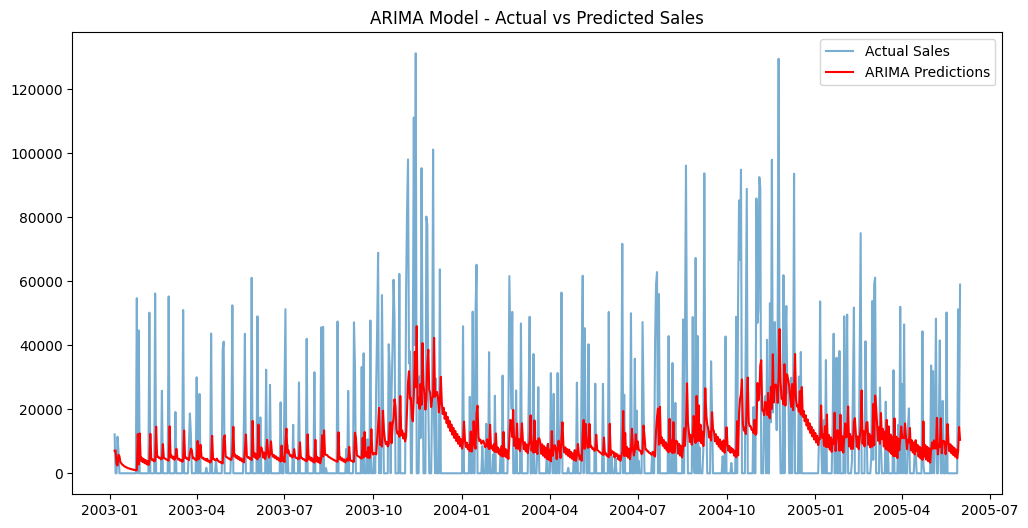

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["SALES"], label="Actual Sales", alpha=0.6)
plt.plot(df_daily_sales["ORDERDATE"], df_daily_sales["ARIMA_Predictions"], label="ARIMA Predictions", color="red")
plt.legend()
plt.title("ARIMA Model - Actual vs Predicted Sales")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(df_daily_sales["SALES"],
                       order=(1, 1, 1),      # ARIMA order (p, d, q)
                       seasonal_order=(1, 1, 1, 12),  # Seasonal order (P, D, Q, S) with period = 12 months
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)


In [ ]:
df_daily_sales["SARIMA_Predictions"] = sarima_result.predict(start=df_daily_sales.index[0],
                                                              end=df_daily_sales.index[-1],
                                                              typ="levels")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate SARIMA model
rmse_sarima = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_Predictions"]))
mae_sarima = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_Predictions"])
mse_sarima = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_Predictions"])

# R-squared calculation
y_true = df_daily_sales["SALES"]
y_pred = df_daily_sales["SARIMA_Predictions"]
ss_residual = np.sum((y_true - y_pred) ** 2)
ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
r2_sarima = 1 - (ss_residual / ss_total)

# Print the evaluation metrics
print(f"SARIMA Model - RMSE: {rmse_sarima}")
print(f"SARIMA Model - MAE: {mae_sarima}")
print(f"SARIMA Model - MSE: {mse_sarima}")
print(f"SARIMA Model - R-squared: {r2_sarima}")


SARIMA Model - RMSE: 20798.202343264806
SARIMA Model - MAE: 15348.144685279114
SARIMA Model - MSE: 432565220.7113856
SARIMA Model - R-squared: 0.03690944422150755


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fit ARIMA model
arima_model = ARIMA(df_daily_sales["SALES"], order=(5, 1, 0))
arima_fit = arima_model.fit()

# Get ARIMA predictions
df_daily_sales["ARIMA_Predictions"] = arima_fit.predict(start=0, end=len(df_daily_sales) - 1)

# Calculate residuals
df_daily_sales["ARIMA_Residuals"] = df_daily_sales["SALES"] - df_daily_sales["ARIMA_Predictions"]

# Train Random Forest model using ARIMA residuals
X_rf = df_daily_sales[["ARIMA_Residuals"]]
y_rf = df_daily_sales["SALES"]

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Get Random Forest predictions
df_daily_sales["RF_Predictions"] = rf_model.predict(X_rf)

# Combine ARIMA and Random Forest predictions
df_daily_sales["ARIMA_RF_Predictions"] = df_daily_sales["ARIMA_Predictions"] + df_daily_sales["RF_Predictions"]

# Evaluate the performance
rmse_rf = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_RF_Predictions"]))
mae_rf = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_RF_Predictions"])
mse_rf = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_RF_Predictions"])
r2_rf = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["ARIMA_RF_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("ARIMA + RF - RMSE:", rmse_rf)
print("ARIMA + RF - MAE:", mae_rf)
print("ARIMA + RF - MSE:", mse_rf)
print("ARIMA + RF - R2:", r2_rf)


ARIMA + RF - RMSE: 14503.096368598646
ARIMA + RF - MAE: 10385.905622169576
ARIMA + RF - MSE: 210339804.27685922
ARIMA + RF - R2: 0.5316861612910351


In [ ]:
import xgboost as xgb

# Train XGBoost model using ARIMA residuals
X_xgb = df_daily_sales[["ARIMA_Residuals"]]
y_xgb = df_daily_sales["SALES"]

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_xgb, y_xgb)

# Get XGBoost predictions
df_daily_sales["XGB_Predictions"] = xgb_model.predict(X_xgb)

# Combine ARIMA and XGBoost predictions
df_daily_sales["ARIMA_XGB_Predictions"] = df_daily_sales["ARIMA_Predictions"] + df_daily_sales["XGB_Predictions"]

# Evaluate the performance
rmse_xgb = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_XGB_Predictions"]))
mae_xgb = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_XGB_Predictions"])
mse_xgb = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_XGB_Predictions"])
r2_xgb = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["ARIMA_XGB_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("ARIMA + XGBoost - RMSE:", rmse_xgb)
print("ARIMA + XGBoost - MAE:", mae_xgb)
print("ARIMA + XGBoost - MSE:", mse_xgb)
print("ARIMA + XGBoost - R2:", r2_xgb)


ARIMA + XGBoost - RMSE: 14165.425073609451
ARIMA + XGBoost - MAE: 10487.542085691182
ARIMA + XGBoost - MSE: 200659267.51604334
ARIMA + XGBoost - R2: 0.5532395203749567


In [ ]:
import lightgbm as lgb

# Train LightGBM model using ARIMA residuals
X_lgbm = df_daily_sales[["ARIMA_Residuals"]]
y_lgbm = df_daily_sales["SALES"]

lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgbm_model.fit(X_lgbm, y_lgbm)

# Get LightGBM predictions
df_daily_sales["LGBM_Predictions"] = lgbm_model.predict(X_lgbm)

# Combine ARIMA and LightGBM predictions
df_daily_sales["ARIMA_LGBM_Predictions"] = df_daily_sales["ARIMA_Predictions"] + df_daily_sales["LGBM_Predictions"]

# Evaluate the performance
rmse_lgbm = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_LGBM_Predictions"]))
mae_lgbm = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_LGBM_Predictions"])
mse_lgbm = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_LGBM_Predictions"])
r2_lgbm = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["ARIMA_LGBM_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("ARIMA + LGBM - RMSE:", rmse_lgbm)
print("ARIMA + LGBM - MAE:", mae_lgbm)
print("ARIMA + LGBM - MSE:", mse_lgbm)
print("ARIMA + LGBM - R2:", r2_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 877, number of used features: 1
[LightGBM] [Info] Start training from score 10592.566224
ARIMA + LGBM - RMSE: 14092.409907528903
ARIMA + LGBM - MAE: 10547.330816404616
ARIMA + LGBM - MSE: 198596017.00181878
ARIMA + LGBM - R2: 0.5578332717662193


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Train AdaBoost model using ARIMA residuals
X_ab = df_daily_sales[["ARIMA_Residuals"]]
y_ab = df_daily_sales["SALES"]

ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ab_model.fit(X_ab, y_ab)

# Get AdaBoost predictions
df_daily_sales["AB_Predictions"] = ab_model.predict(X_ab)

# Combine ARIMA and AdaBoost predictions
df_daily_sales["ARIMA_AB_Predictions"] = df_daily_sales["ARIMA_Predictions"] + df_daily_sales["AB_Predictions"]

# Evaluate the performance
rmse_ab = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_AB_Predictions"]))
mae_ab = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_AB_Predictions"])
mse_ab = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["ARIMA_AB_Predictions"])
r2_ab = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["ARIMA_AB_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("ARIMA + AdaBoost - RMSE:", rmse_ab)
print("ARIMA + AdaBoost - MAE:", mae_ab)
print("ARIMA + AdaBoost - MSE:", mse_ab)
print("ARIMA + AdaBoost - R2:", r2_ab)


ARIMA + AdaBoost - RMSE: 16138.596167808751
ARIMA + AdaBoost - MAE: 12946.808566262023
ARIMA + AdaBoost - MSE: 260454286.26761132
ARIMA + AdaBoost - R2: 0.42010811016235283


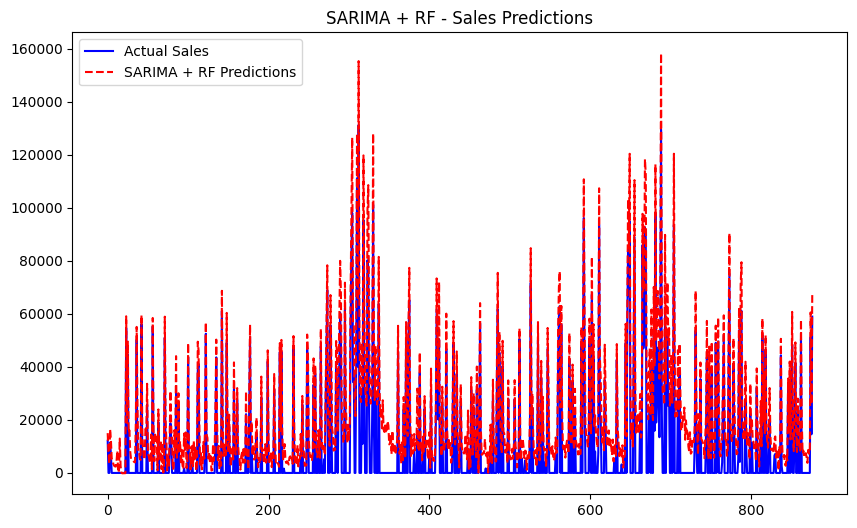

SARIMA + RF - RMSE: 12969.18957940981
SARIMA + RF - MAE: 10883.826492709306
SARIMA + RF - MSE: 168199878.34667203
SARIMA + RF - R2: 0.6255091566252974


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Fit SARIMA model
sarima_model = SARIMAX(df_daily_sales["SALES"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Get SARIMA predictions
df_daily_sales["SARIMA_Predictions"] = sarima_fit.predict(start=0, end=len(df_daily_sales) - 1)

# Calculate residuals
df_daily_sales["SARIMA_Residuals"] = df_daily_sales["SALES"] - df_daily_sales["SARIMA_Predictions"]

# Train Random Forest model using SARIMA residuals
X_rf = df_daily_sales[["SARIMA_Residuals"]]
y_rf = df_daily_sales["SALES"]

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Get Random Forest predictions
df_daily_sales["RF_Predictions"] = rf_model.predict(X_rf)

# Combine SARIMA and Random Forest predictions
df_daily_sales["SARIMA_RF_Predictions"] = df_daily_sales["SARIMA_Predictions"] + df_daily_sales["RF_Predictions"]

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales["SALES"], label="Actual Sales", color='blue')
plt.plot(df_daily_sales["SARIMA_RF_Predictions"], label="SARIMA + RF Predictions", color='red', linestyle='--')
plt.title("SARIMA + RF - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_rf = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_RF_Predictions"]))
mae_rf = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_RF_Predictions"])
mse_rf = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_RF_Predictions"])
r2_rf = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["SARIMA_RF_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("SARIMA + RF - RMSE:", rmse_rf)
print("SARIMA + RF - MAE:", mae_rf)
print("SARIMA + RF - MSE:", mse_rf)
print("SARIMA + RF - R2:", r2_rf)


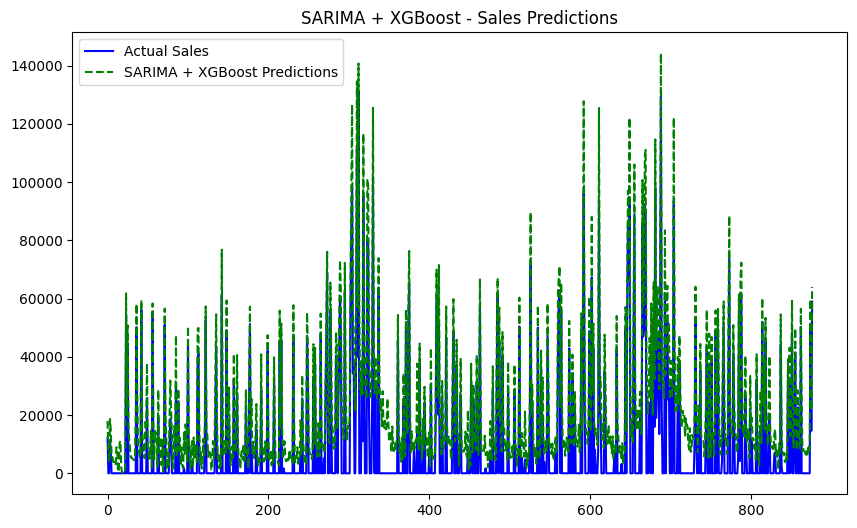

SARIMA + XGBoost - RMSE: 12762.50825543778
SARIMA + XGBoost - MAE: 10914.596631011931
SARIMA + XGBoost - MSE: 162881616.9701175
SARIMA + XGBoost - R2: 0.637350069994379


In [ ]:
import xgboost as xgb

# Train XGBoost model using SARIMA residuals
X_xgb = df_daily_sales[["SARIMA_Residuals"]]
y_xgb = df_daily_sales["SALES"]

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_xgb, y_xgb)

# Get XGBoost predictions
df_daily_sales["XGB_Predictions"] = xgb_model.predict(X_xgb)

# Combine SARIMA and XGBoost predictions
df_daily_sales["SARIMA_XGB_Predictions"] = df_daily_sales["SARIMA_Predictions"] + df_daily_sales["XGB_Predictions"]

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales["SALES"], label="Actual Sales", color='blue')
plt.plot(df_daily_sales["SARIMA_XGB_Predictions"], label="SARIMA + XGBoost Predictions", color='green', linestyle='--')
plt.title("SARIMA + XGBoost - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_xgb = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_XGB_Predictions"]))
mae_xgb = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_XGB_Predictions"])
mse_xgb = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_XGB_Predictions"])
r2_xgb = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["SARIMA_XGB_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("SARIMA + XGBoost - RMSE:", rmse_xgb)
print("SARIMA + XGBoost - MAE:", mae_xgb)
print("SARIMA + XGBoost - MSE:", mse_xgb)
print("SARIMA + XGBoost - R2:", r2_xgb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 877, number of used features: 1
[LightGBM] [Info] Start training from score 10592.566224


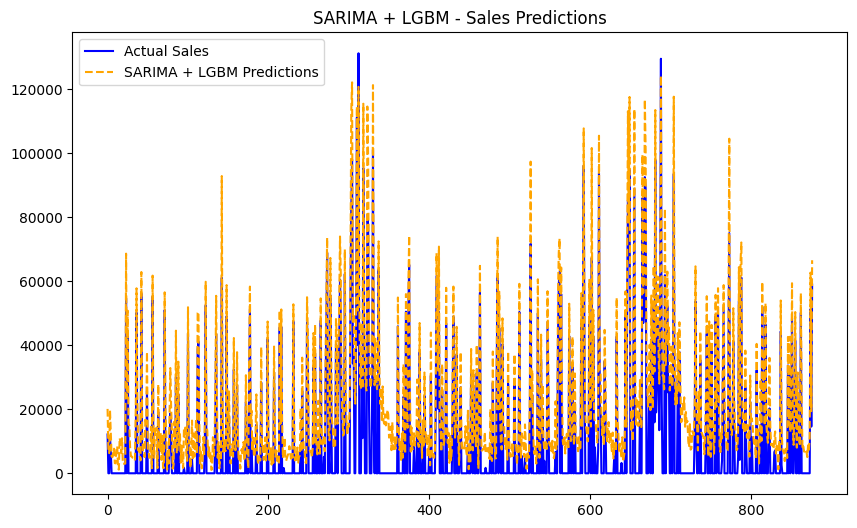

SARIMA + LGBM - RMSE: 12753.319269258049
SARIMA + LGBM - MAE: 10954.864009797982
SARIMA + LGBM - MSE: 162647152.38362864
SARIMA + LGBM - R2: 0.6378720967734635


In [ ]:
import lightgbm as lgb

# Train LightGBM model using SARIMA residuals
X_lgbm = df_daily_sales[["SARIMA_Residuals"]]
y_lgbm = df_daily_sales["SALES"]

lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgbm_model.fit(X_lgbm, y_lgbm)

# Get LightGBM predictions
df_daily_sales["LGBM_Predictions"] = lgbm_model.predict(X_lgbm)

# Combine SARIMA and LightGBM predictions
df_daily_sales["SARIMA_LGBM_Predictions"] = df_daily_sales["SARIMA_Predictions"] + df_daily_sales["LGBM_Predictions"]

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales["SALES"], label="Actual Sales", color='blue')
plt.plot(df_daily_sales["SARIMA_LGBM_Predictions"], label="SARIMA + LGBM Predictions", color='orange', linestyle='--')
plt.title("SARIMA + LGBM - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_lgbm = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_LGBM_Predictions"]))
mae_lgbm = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_LGBM_Predictions"])
mse_lgbm = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_LGBM_Predictions"])
r2_lgbm = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["SARIMA_LGBM_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("SARIMA + LGBM - RMSE:", rmse_lgbm)
print("SARIMA + LGBM - MAE:", mae_lgbm)
print("SARIMA + LGBM - MSE:", mse_lgbm)
print("SARIMA + LGBM - R2:", r2_lgbm)


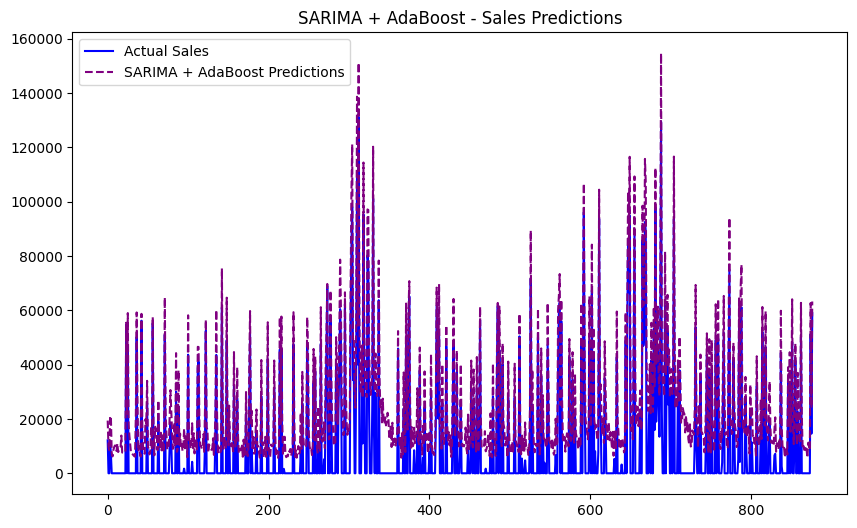

SARIMA + AdaBoost - RMSE: 14420.661727206398
SARIMA + AdaBoost - MAE: 13069.175156690677
SARIMA + AdaBoost - MSE: 207955484.6505154
SARIMA + AdaBoost - R2: 0.5369947612527068


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Train AdaBoost model using SARIMA residuals
X_ab = df_daily_sales[["SARIMA_Residuals"]]
y_ab = df_daily_sales["SALES"]

ab_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ab_model.fit(X_ab, y_ab)

# Get AdaBoost predictions
df_daily_sales["AB_Predictions"] = ab_model.predict(X_ab)

# Combine SARIMA and AdaBoost predictions
df_daily_sales["SARIMA_AB_Predictions"] = df_daily_sales["SARIMA_Predictions"] + df_daily_sales["AB_Predictions"]

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales["SALES"], label="Actual Sales", color='blue')
plt.plot(df_daily_sales["SARIMA_AB_Predictions"], label="SARIMA + AdaBoost Predictions", color='purple', linestyle='--')
plt.title("SARIMA + AdaBoost - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_ab = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_AB_Predictions"]))
mae_ab = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_AB_Predictions"])
mse_ab = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["SARIMA_AB_Predictions"])
r2_ab = 1 - (np.sum((df_daily_sales["SALES"] - df_daily_sales["SARIMA_AB_Predictions"])**2) / np.sum((df_daily_sales["SALES"] - np.mean(df_daily_sales["SALES"]))**2))

print("SARIMA + AdaBoost - RMSE:", rmse_ab)
print("SARIMA + AdaBoost - MAE:", mae_ab)
print("SARIMA + AdaBoost - MSE:", mse_ab)
print("SARIMA + AdaBoost - R2:", r2_ab)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 848, number of used features: 1
[LightGBM] [Info] Start training from score 10801.800682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

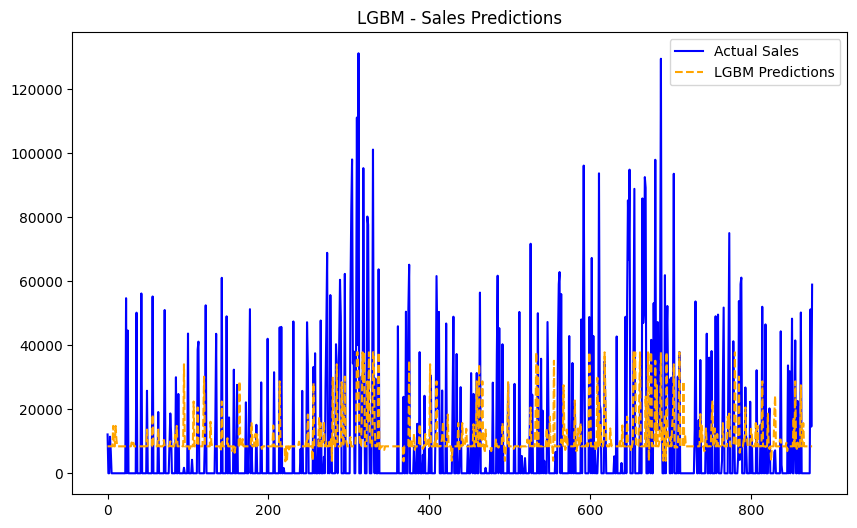

LGBM - RMSE: 19730.861577937827
LGBM - MAE: 14092.727050291362
LGBM - MSE: 389306898.60774326
LGBM - R²: 0.133222507505528


In [ ]:
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare data for LightGBM
# We will use a lag of 7 as a feature (weekly lag for time series prediction)
df_daily_sales['lag_7'] = df_daily_sales['SALES'].shift(7)

# Drop missing values from lag
df_lgbm = df_daily_sales.dropna()

# Define features and target
X_lgbm = df_lgbm[['lag_7']]  # Using lag_7 as feature
y_lgbm = df_lgbm['SALES']    # Target is the sales column

# Train LightGBM model
lgbm_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgbm_model.fit(X_lgbm, y_lgbm)

# Make predictions
df_daily_sales['LGBM_Predictions'] = lgbm_model.predict(df_daily_sales[['lag_7']])

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales['SALES'], label="Actual Sales", color='blue')
plt.plot(df_daily_sales['LGBM_Predictions'], label="LGBM Predictions", color='orange', linestyle='--')
plt.title("LGBM - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_lgbm = np.sqrt(mean_squared_error(df_daily_sales['SALES'], df_daily_sales['LGBM_Predictions']))
mae_lgbm = mean_absolute_error(df_daily_sales['SALES'], df_daily_sales['LGBM_Predictions'])
mse_lgbm = mean_squared_error(df_daily_sales['SALES'], df_daily_sales['LGBM_Predictions'])
r2_lgbm = 1 - (np.sum((df_daily_sales['SALES'] - df_daily_sales['LGBM_Predictions'])**2) / np.sum((df_daily_sales['SALES'] - np.mean(df_daily_sales['SALES']))**2))

print("LGBM - RMSE:", rmse_lgbm)
print("LGBM - MAE:", mae_lgbm)
print("LGBM - MSE:", mse_lgbm)
print("LGBM - R²:", r2_lgbm)


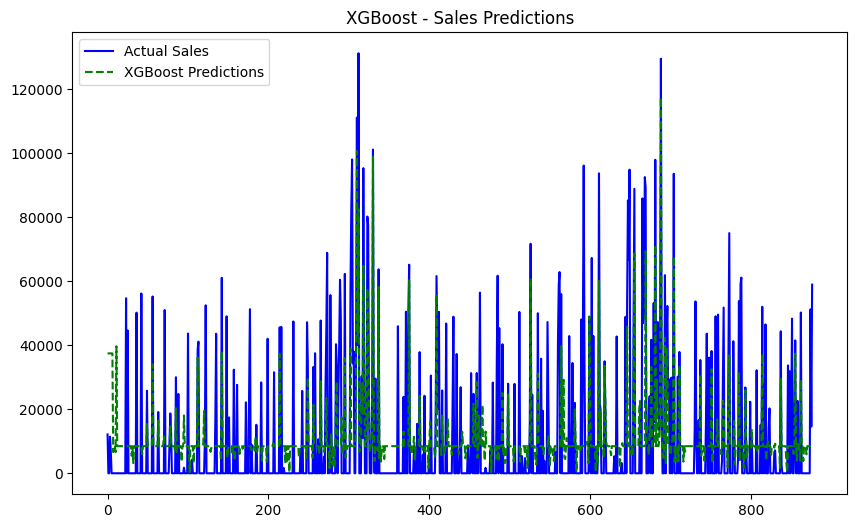

XGBoost - RMSE: 16679.501023654837
XGBoost - MAE: 11737.546316636193
XGBoost - MSE: 278205754.39810276
XGBoost - R²: 0.38058511920260085


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare data for XGBoost
# Again using lag_7 as a feature
df_xgb = df_daily_sales.dropna()  # Drop any missing values

# Define features and target
X_xgb = df_xgb[['lag_7']]  # Using lag_7 as feature
y_xgb = df_xgb['SALES']    # Target is the sales column

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_xgb, y_xgb)

# Make predictions
df_daily_sales['XGB_Predictions'] = xgb_model.predict(df_daily_sales[['lag_7']])

# Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(df_daily_sales['SALES'], label="Actual Sales", color='blue')
plt.plot(df_daily_sales['XGB_Predictions'], label="XGBoost Predictions", color='green', linestyle='--')
plt.title("XGBoost - Sales Predictions")
plt.legend()
plt.show()

# Evaluate the performance
rmse_xgb = np.sqrt(mean_squared_error(df_daily_sales['SALES'], df_daily_sales['XGB_Predictions']))
mae_xgb = mean_absolute_error(df_daily_sales['SALES'], df_daily_sales['XGB_Predictions'])
mse_xgb = mean_squared_error(df_daily_sales['SALES'], df_daily_sales['XGB_Predictions'])
r2_xgb = 1 - (np.sum((df_daily_sales['SALES'] - df_daily_sales['XGB_Predictions'])**2) / np.sum((df_daily_sales['SALES'] - np.mean(df_daily_sales['SALES']))**2))

print("XGBoost - RMSE:", rmse_xgb)
print("XGBoost - MAE:", mae_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R²:", r2_xgb)


In [ ]:



# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dates (same as original dataset for evaluation)
future_dates = prophet_model.make_future_dataframe(periods=0)

# Predict sales
forecast = prophet_model.predict(future_dates)

# Extract predicted values
df_daily_sales["FBProphet_Predictions"] = forecast["yhat"].values

# Calculate evaluation metrics
rmse_fb = np.sqrt(mean_squared_error(df_daily_sales["SALES"], df_daily_sales["FBProphet_Predictions"]))
mae_fb = mean_absolute_error(df_daily_sales["SALES"], df_daily_sales["FBProphet_Predictions"])
mse_fb = mean_squared_error(df_daily_sales["SALES"], df_daily_sales["FBProphet_Predictions"])
r2_fb = r2_score(df_daily_sales["SALES"], df_daily_sales["FBProphet_Predictions"])

# Print evaluation metrics
print(f"FB Prophet - RMSE: {rmse_fb}")
print(f"FB Prophet - MAE: {mae_fb}")
print(f"FB Prophet - MSE: {mse_fb}")
print(f"FB Prophet - R²: {r2_fb}")

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales["DATE"], df_daily_sales["SALES"], label="Actual Sales", color='blue')
plt.plot(df_daily_sales["DATE"], df_daily_sales["FBProphet_Predictions"], label="FB Prophet Predictions", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("FB Prophet - Actual vs Predicted Sales")
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwpced9m0/6baanmgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwpced9m0/hmffi6gq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79897', 'data', 'file=/tmp/tmpwpced9m0/6baanmgj.json', 'init=/tmp/tmpwpced9m0/hmffi6gq.json', 'output', 'file=/tmp/tmpwpced9m0/prophet_modelj_y3ka9e/prophet_model-20250205043026.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:30:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


FB Prophet - RMSE: 19196.68016557468
FB Prophet - MAE: 13496.384279758719
FB Prophet - MSE: 368512529.37936825
FB Prophet - R²: 0.1795204058531651


KeyError: 'DATE'

<Figure size 1200x600 with 0 Axes>